In [ ]:
!pip install pennylane > h

**Exercise 1:**

The goal of this exercise will be to calculate the kernel function $K(\vec{x_i}, \vec{x_j})$ where the inputs $\vec{x}$ will be vectors of dimension 2 and the feature map will be the ZZ Feature map :
```python
def feature_map(x):
    
    # ZZMap
    for i in range(2):
        qml.Hadamard(wires = i)


    qml.RZ(2*x[0], wires = 0)
    qml.RZ(2*x[1], wires = 1)
    qml.CNOT(wires = [0,1])
    qml.RZ(2*(np.pi - x[0])*(np.pi - x[1]), wires = 1)
    qml.CNOT(wires = [0,1])
    
```

To do this, you are asked to use the Hadamard test.

**Solution 1:**

Using our feature map we can generate $F(\vec{x})|0\rangle$. Our goal is to calculate $\mathcal{Re}(\langle 0 | F(\vec{x_i})^{\dagger} F(\vec{x_j}) | 0 \rangle)$. This is equivalent to applying the Hadamard Test on the operator $U:= F(\vec{x_i})^{\dagger} F(\vec{x_j})$

In [ ]:
#@title

import pennylane as qml
import numpy as np

x_i = [1., 2.]
x_j = [1., -3.]

def feature_map(x, wires):

    # ZZMap
    for i in range(2):
        qml.Hadamard(wires = wires[i])


    qml.RZ(2*x[0], wires = wires[0])
    qml.RZ(2*x[1], wires = wires[1])
    qml.CNOT(wires = wires)
    qml.RZ(2*(np.pi - x[0])*(np.pi - x[1]), wires = wires[1])
    qml.CNOT(wires = wires)


def U(x_i, x_j, wires):

    feature_map(x_j, wires)
    qml.adjoint(feature_map)(x_i, wires)


dev = qml.device("default.qubit", wires = 3)

@qml.qnode(dev)
def circuit(x_i, x_j):

    qml.Hadamard(wires = 0)

    qml.ctrl(U, control = 0)(x_i, x_j, [1,2])

    qml.Hadamard(wires = 0)

    return qml.expval(qml.PauliZ(wires = 0))

circuit(x_i, x_j)


np.float64(-0.08046423546177384)

**Exercise 2:**

Using the `sklearn` library, integrate the kernel function in the `svm` to build a classifier for the following dataset:


120


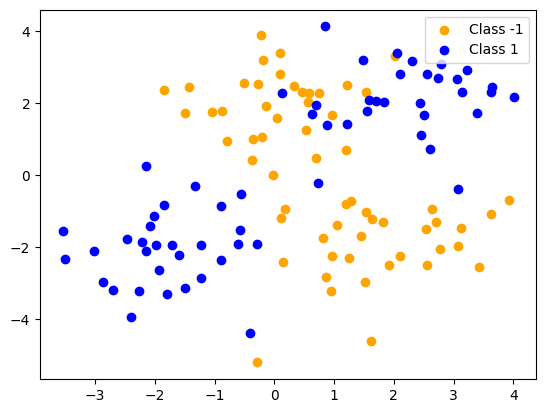

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

n_samples = 30 * 4

A = np.array([[np.random.normal(loc=0), np.random.normal(loc=2)] for i in range(n_samples//4)])
B = np.array([[np.random.normal(loc=2), np.random.normal(loc=-2)] for i in range(n_samples//4)])
C = np.array([[np.random.normal(loc=2), np.random.normal(loc=2)] for i in range(n_samples//4)])
D = np.array([[np.random.normal(loc=-2), np.random.normal(loc=-2)] for i in range(n_samples//4)])

feature = np.concatenate([A, B, C, D], axis=0)/4
label = np.concatenate([-np.ones(n_samples // 2), np.ones(n_samples//2)], axis=0)
data = list(zip(feature, label))

np.random.shuffle(data)
print(len(data))

plt.scatter(A[:,0], A[:,1], color="orange", label="Class -1")
plt.scatter(B[:,0], B[:,1], color="orange")
plt.scatter(C[:,0], C[:,1], color="blue", label="Class 1")
plt.scatter(D[:,0], D[:,1], color="blue")
plt.legend()
plt.show()

**Solution 2:**

Source: https://github.com/KetpuntoG/Notebooks-del-canal


In [ ]:
#@title

import numpy as np

percentage = 0.5
m = int(percentage * n_samples)


x_train = np.array([data[i][0] for i in range(m)])
y_train = np.array([data[i][1] for i in range(m)])

x_test = np.array([data[i][0] for i in range(m,n_samples)])
y_test = np.array([data[i][1] for i in range(m,n_samples)])

In [ ]:
#@title

import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt
from time import time
from sklearn import svm
import scipy



def KernelMatrix(X1, X2):
    print("Calculating kernel matrix...")


    gram_matrix = np.zeros((X1.shape[0], X2.shape[0]))
    for i, x1 in enumerate(X1):
        for j, x2 in enumerate(X2):

            x1 = x1.flatten()
            x2 = x2.flatten()

            gram_matrix[i, j] = circuit(x1, x2)

    return gram_matrix


clf = svm.SVC(kernel="precomputed")

matrix = KernelMatrix(x_train,x_train)

print("Training...")
clf.fit(matrix, y_train)

#test
print("Checking test...")

sol = clf.predict(KernelMatrix(x_test,x_train))

success = 0
for i in range(len(y_test)):
    if sol[i] == y_test[i]:
        success += 1

print("Test accuracy: ", success/len(sol)*100, "%")

Calculating kernel matrix...
Training...
Checking test...
Calculating kernel matrix...
Test accuracy:  78.33333333333333 %


prediction:


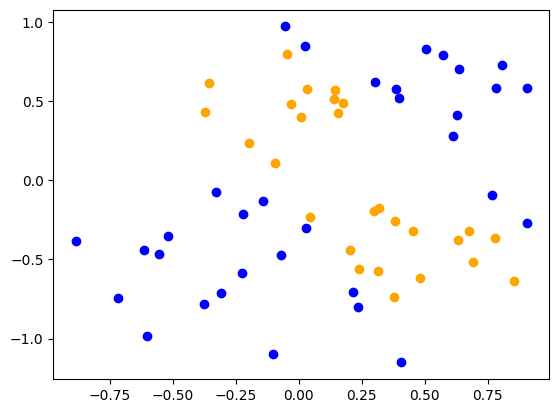

real:


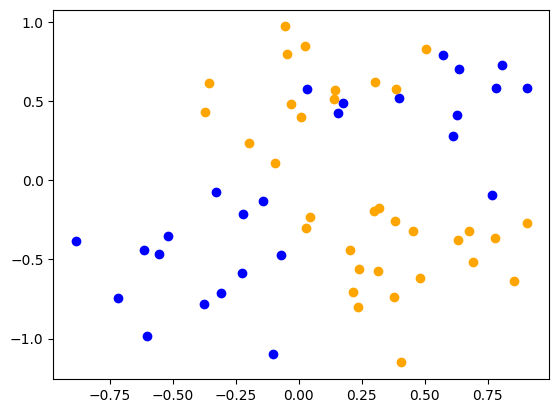

In [ ]:
#@title

print("prediction:")

for i in range(len(x_test)):
    color = "blue"
    if sol[i] == -1:
        color = "orange"

    plt.scatter(x_test[i,0], x_test[i,1], color = color)

plt.show()

print("real:")
for i in range(len(x_test)):
    color = "blue"
    if y_test[i] == -1:
        color = "orange"

    plt.scatter(x_test[i,0], x_test[i,1], color = color)

plt.show()